# Project Name: Viewer Engagement with YouTube News Videos

# Introduction

The data analyzed comes from a YouTube engagement survey by Wu et al. (GitHub: https://github.com/avalanchesiqi/youtube-engagement/blob/master/data/README.md). We are using the top_news.json file from the quality videos dataset (https://drive.google.com/drive/folders/1wZwDIR18IHPPTiH1C0dyBbGPR-3MktI7), which contains information about videos of the top 100 most viewed news channels. The question being addressed is: How does the topic of a video influence viewer engagement?

# Data

The original dataframe has 6 columns, 5 of which contain dict values. First, a separate dataframe is created for each of those 5 columns. For example, from the statistics column, a new dataframe is created with the dict's keys as its columns. The NA values and duplicates are then dropped from these dataframes. The code used to clean the data is the cleanup.py file.

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_json('top_news.json', lines=True)
print('Number of rows:', df.size)
df.head(3)

Number of rows: 172110


,topicDetails,statistics,contentDetails,snippet,id,insights
0,{'topicCategories': ['https://en.wikipedia.org...,"{'commentCount': '0', 'viewCount': '701', 'fav...","{'duration': 'PT11M5S', 'definition': 'sd', 'd...",{'description': '⬇ Descargá la App de C5N para...,JEibcX5VF1M,"{'startDate': '2016-08-21', 'dailyShare': '6,2..."
1,{'topicCategories': ['https://en.wikipedia.org...,"{'commentCount': '0', 'viewCount': '889', 'fav...","{'duration': 'PT4M9S', 'definition': 'sd', 'di...",{'description': '⬇ Descargá la App de C5N para...,CJwOo9Yp3Jk,"{'startDate': '2016-08-10', 'dailyShare': '0,0..."
2,{'topicCategories': ['https://en.wikipedia.org...,"{'commentCount': '4', 'viewCount': '12720', 'f...","{'duration': 'PT13M11S', 'definition': 'hd', '...","{'description': '', 'title': 'C5N - Road Music...",CbdrzQPgGpI,"{'startDate': '2016-07-31', 'dailyShare': '5,2..."


In [3]:
import cleanup
topicDetails, statistics, contentDetails, snippets, insights = cleanup.cleanup() # runtime is several minutes

In [4]:
# Final dataframe created for the statistics column.
statistics.head(3)

,commentCount,viewCount,favoriteCount,dislikeCount,likeCount
0,0,701,0,0,9
1,0,889,0,0,10
2,4,12720,0,4,213


# Visualization 1: Bar Chart

The visualization highlights the predominant categories in top news. Each video in the database falls into specific categories set during upload. These categories are tallied to identify the most popular news video genres. Notably, the "Society" tag emerges as a clear frontrunner, aligning with the societal events focus typical of top news. Other prevalent genres encompass "Politics," "Lifestyle," "Music," and "Film." Gaining visibility into these genres and their popularity paves the way for more profound insights derived from the collective video data.

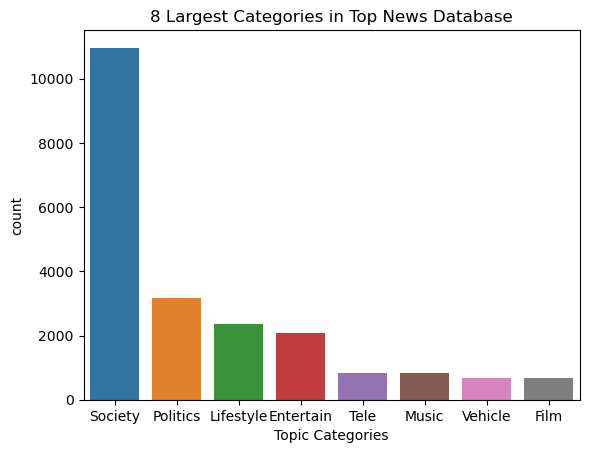

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from visualization import *

makeGraph()

# Visualization 2: Box Plot


The second visualization focused on comparing the total view counts of two similarly sized categories, 'Entertainment' and 'Politics,' to determine if one typically garners more views than the other. A logarithmic scale was employed in the box plot to manage the prevalence of outliers. This approach revealed that both categories predominantly fall within the 1,000 to 10,000 view range. However, it was observed that Politics news videos generally receive fewer views on average compared to Entertainment news videos, despite both categories having outliers reaching into the millions.

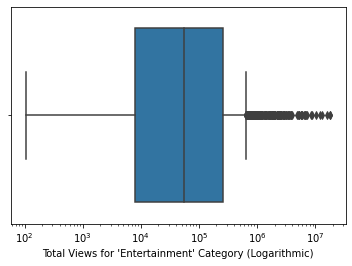

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from visualization3 import *

makeChart2()

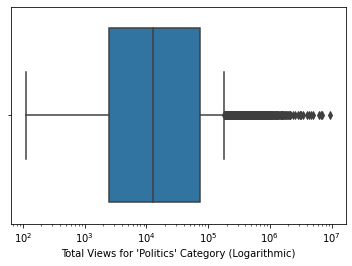

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from visualization3 import *

makeChart3()

# Visualization 3: Line Graph

This graph delves deeper into the comparison of a video view count between the Entertainment and Politics categories on YouTube. At week 0, the view count of Politics is higher than that of Entertainment. However, as time progresses, the weekly views of Entertainment surpass those of Politics and remain higher until week 50.
Notably, the weekly views of Entertainment vary greatly from week to week, while the view counts of Politics drop significantly after week 0 and remain fairly constant. This could be attributed to the possibility that Politics is generally more relevant in the present but may not remain as interesting in the future, resulting in a decline in view counts that fail to regain their initial momentum.

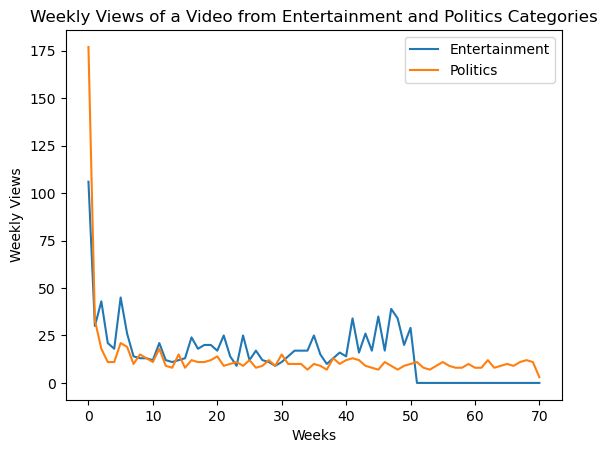

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from Visualization2 import *
lineGraphVisualization()

# ML Analysis 1: Decision Tree

The initial machine learning analysis involved creating a supervised decision tree classifier to predict whether a video's topic category falls into one of the big five categories—Society, Politics, Lifestyle, Entertainment, or Music—based on video statistics like viewCount, dislikeCount, and likeCount. A binary target column was used, with 1 indicating that the video's category was among the big five, and 0 if not. The dataset was divided into 70% for training, 10% for validation, and 20% for testing. Employing entropy as the criterion and setting a maximum tree depth of 4, the decision tree classifier achieved a test accuracy of 0.8356. This highlighted that video engagement metrics are effective predictors of a video's category being one of the big five. However, while expanding the entire tree yielded a 100% accuracy on training data, it led to overfitting when applied to test data. Therefore, it was crucial to constrain the tree's depth to ensure performance consistency with unseen data.


Train accuracy: 0.794555063913471
Validation accuracy: 0.7341935483870967
Test accuracy: 0.8356282271944923


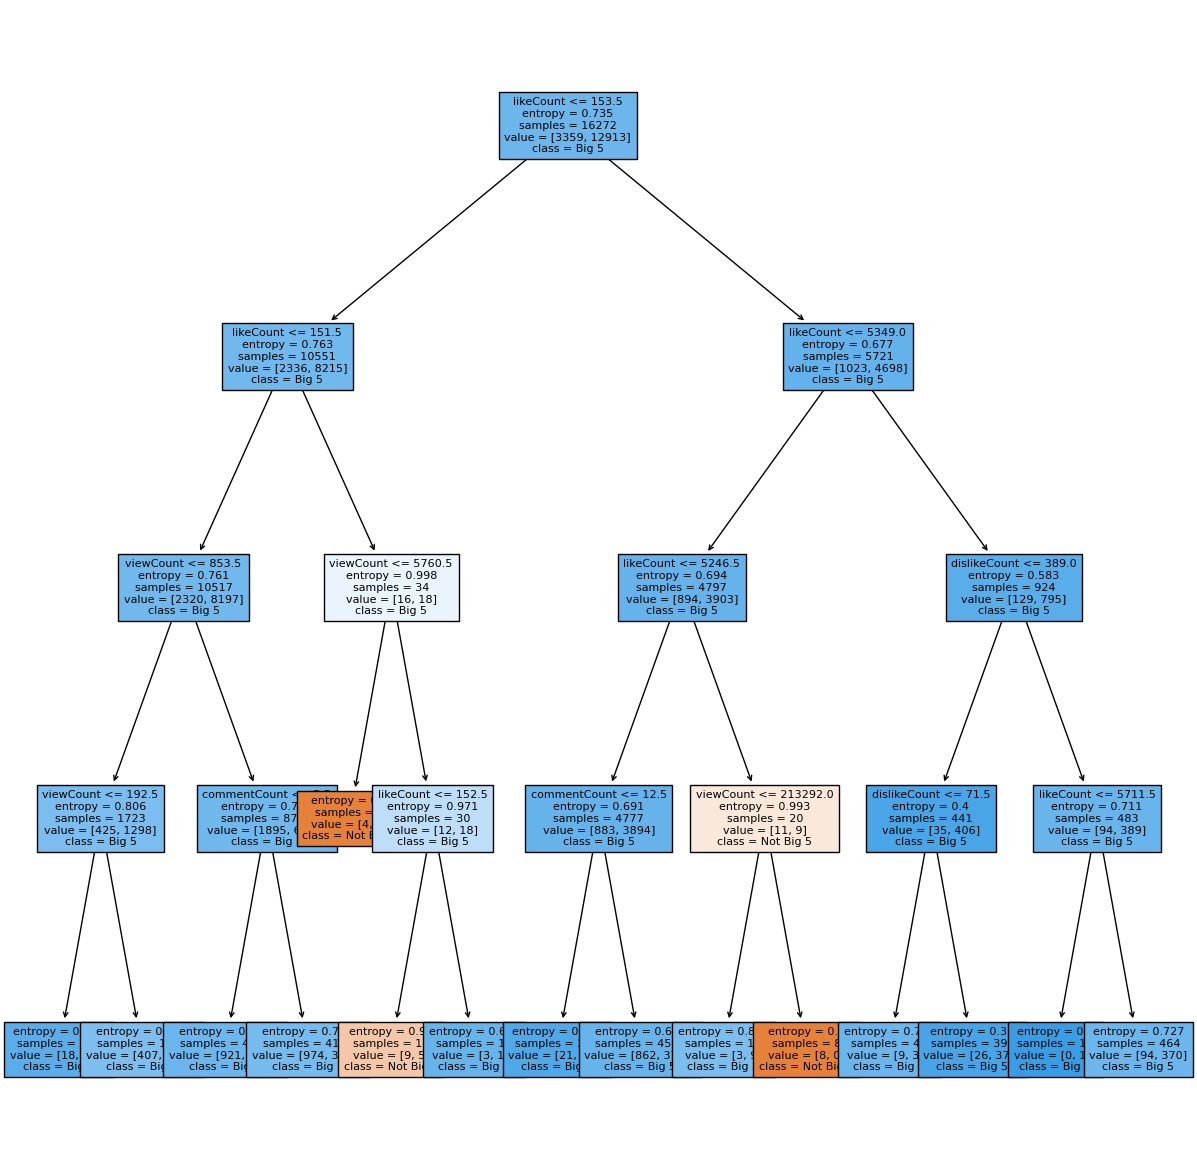

In [2]:
import decision_tree
train_accuracy, val_accuracy, test_accuracy, dt = decision_tree.analyze()

print()
print('Train accuracy:', train_accuracy)
print('Validation accuracy:', val_accuracy)
print('Test accuracy:', test_accuracy)
dt;

# ML Analysis 2: K-Nearest Neighbors

This analysis employs the K-Nearest Neighbors (KNN) algorithm of machine learning to categorize news articles based on their comment count. The source data is retrieved from a 'top_news.json' file. The analysis involves several preprocessing stages such as computing statistics from the initial dataset, constructing a new dataframe with topic categories, encoding the target labels, partitioning the data into training and testing sets, and normalizing the data. Ultimately, the KNN classifier is trained using the training set, and the accuracy of the model is measured on the test set. The objective is to predict the topic categories based on the comment count, and the performance of the model is expressed as its accuracy.

C:\Users\d20patel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.2601


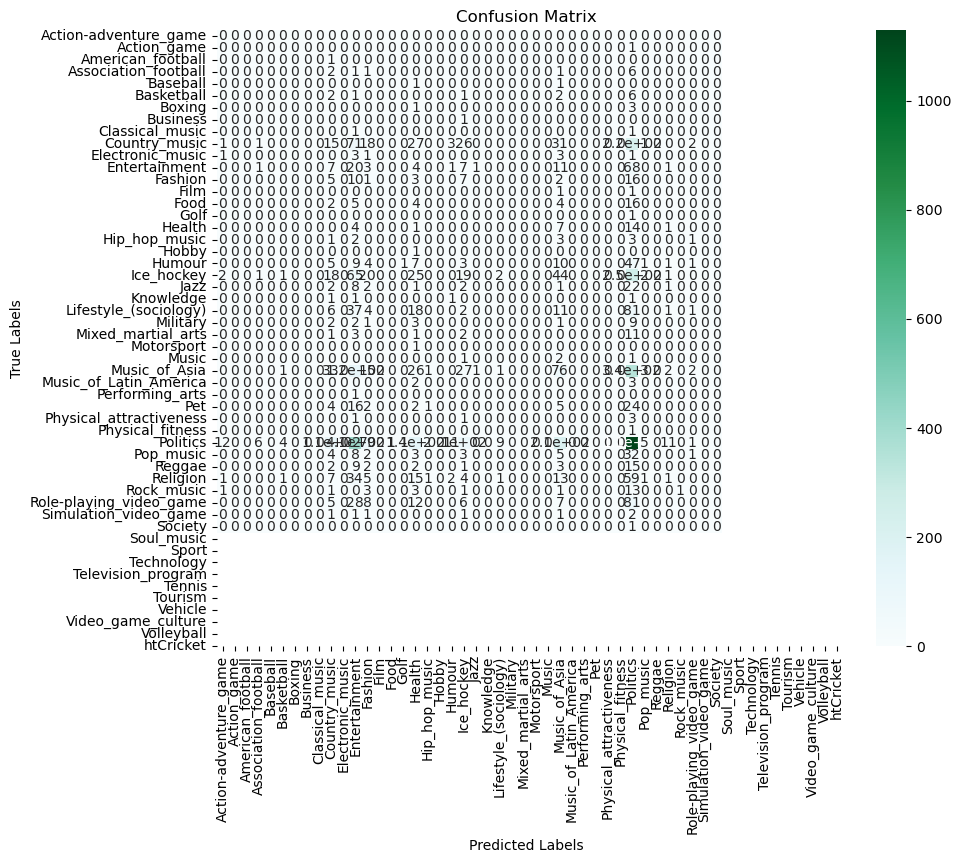

0.2601441812564367

In [2]:
import machine_learning_classifier
machine_learning_classifier.knn_analysis()

# Results

This project is aimed to explore the relationship between video topic categories and viewer engagement on YouTube. Using a dataset of the top 100 most viewed news channels, it is focused on the quality videos dataset, analyzing video categories, view counts, likes, and dislikes. The findings suggest that the topic category of a video significantly impacts viewer engagement, with engagement statistics serving as important predictors of video category topics.

The analysis included three key visualizations. The bar chart revealed that the most popular video genres were "Society", "Politics", "Lifestyle", "Music", and "Film". The box plot comparison showed that videos in the "Entertainment" category generally received more views than those in the "Politics" category although both had notable outliers in the millions of views. Additionally, the line graph provided insights into the temporal dynamics between the Entertainment and Politics categories. It demonstrated that while Politics had a higher view count at week 0, Entertainment surpassed it in subsequent weeks and maintained a consistently higher viewership.

These findings offer valuable insights for content creators and news channels on YouTube. By optimizing their video topics based on viewer engagement and understanding the interests of their audience, creators and channels can improve their content strategies. Furthermore, the machine learning analyses emphasized the importance of engagement statistics in accurately predicting video category topics. Overall, this project enhances the understanding of the impact of video topic categories on viewer engagement, providing actionable insights for content creators and news channels to enhance their content and engage their audience effectively.